In [1]:
!pip install pomegranate

     |████████████████████████████████| 4.3 MB 60 kB/s eta 0:00:014
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached numpy-1.21.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Created wheel for pomegranate: filename=pomegranate-0.14.7-cp38-cp38-linux_x86_64.whl size=22739503 sha256=95188dc9b3a8fb5f896111a149d8963ab545e5de6a93e0ed98e56b6eec3d8267
  Stored in directory: /home/oreganko/.cache/pip/wheels/35/2b/52/d9cf641fadfa792524e780fdea5d6b6e4b22f638a50473f900
Successfully built pomegranate
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [2]:
#Import required packages
import math
from pomegranate import *
 
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random process
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door Monty picks, depends on the choice of the guest and the prize door
monty =ConditionalProbabilityTable(
[[ 'A', 'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )
 
d1 = State( guest, name="guest" )
d2 = State( prize, name="prize" )
d3 = State( monty, name="monty" )
 
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.bake()

In [3]:
beliefs = network.predict_proba({ 'guest' : 'A' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}nmontyt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.49999999999999994,
            "C" : 0.49999999999999994,
            "A" : 0.0
        }
    ],
    "frozen" : false
}


In [4]:
beliefs = network.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) ) for state, belief in zip( network.states, beliefs )))

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.0,
            "C" : 0.6666666666666664
        }
    ],
    "frozen" : false
}nmontytB


In [5]:
!pip install pybbn

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39725 sha256=da6a2ee718d63f84fbd218666ae3ab21a70caa4014fe1ed7561b0f408aef3e92
  Stored in directory: /home/oreganko/.cache/pip/wheels/06/80/2f/0e63fe5497b2917af3b7bdcbb142985ba4e5e5ef9a2c0b14b9
Successfully built pybbn


In [6]:
from pybbn.causality.ace import Ace
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.pptc.inferencecontroller import InferenceController

In [7]:

# create a BBN
contestant_probs =  [0.33, 0.33, 0.33]
prize_probs = [0.33, 0.33, 0.33]
host_probs = [0, 0.5, 0.5, #A, A 
                                                0, 0, 1, #A, B
                                                0, 1, 0, #A, C 
                                                0, 0, 1, #B, A
                                                0.5, 0, 0.5, #B, B
                                                1, 0, 0, #B, C
                                                0, 1, 0, #C, A
                                                1, 0, 0, #C, B
                                                0.5, 0.5, 0 #C, C
                                                ]

C = BbnNode(Variable(0, 'C', ['a', 'b', 'c']), contestant_probs)
P = BbnNode(Variable(1, 'P', ['a', 'b', 'c']), prize_probs)
H = BbnNode(Variable(2, 'H', ['a', 'b', 'c']), host_probs)

bbn = Bbn() \
    .add_node(C) \
    .add_node(P) \
    .add_node(H) \
    .add_edge(Edge(C, H, EdgeType.DIRECTED)) \
    .add_edge(Edge(P, H, EdgeType.DIRECTED)) 

join_tree = InferenceController.apply(bbn)

def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('-----------------')

In [8]:
evidence('ev1', 'C', 'a', 1.0)
print_probs()

Node: 1|P|a,b,c
Values:
1=a|0.33333
1=b|0.33333
1=c|0.33333
-----------------
Node: 2|H|a,b,c
Values:
2=a|0.00000
2=b|0.50000
2=c|0.50000
-----------------
Node: 0|C|a,b,c
Values:
0=a|1.00000
0=b|0.00000
0=c|0.00000
-----------------


In [9]:
evidence('ev2', 'H', 'b', 1.0)
print_probs()

Node: 1|P|a,b,c
Values:
1=a|0.33333
1=b|0.00000
1=c|0.66667
-----------------
Node: 2|H|a,b,c
Values:
2=a|0.00000
2=b|1.00000
2=c|0.00000
-----------------
Node: 0|C|a,b,c
Values:
0=a|1.00000
0=b|0.00000
0=c|0.00000
-----------------


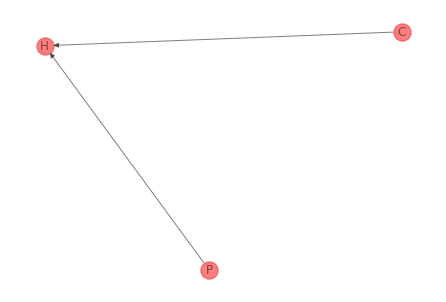

In [10]:
import networkx as nx

n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, node_color='r', alpha=0.5)

In [11]:
!pip install pgmpy 
!pip install daft==0.1.2

     |████████████████████████████████| 1.9 MB 622 kB/s ta 0:00:019


In [29]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.base import DAG

# Defining the network structure
model = BayesianNetwork([('C', 'H'), ('P', 'H')])
# model = DAG()
# model.add_nodes_from(['C', 'H', 'P'])
# model.add_edges_from([('C', 'H'), ('P', 'H')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'P'], evidence_card=[3, 3], state_names={'C': ['a', 'b', 'c'], 
                                                                          'P': ['a', 'b', 'c'],
                                                                          'H': ['a', 'b', 'c']})

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()

[<TabularCPD representing P(C:3) at 0x7f1998d9daf0>,
 <TabularCPD representing P(P:3) at 0x7f199a9a0b80>,
 <TabularCPD representing P(H:3 | C:3, P:3) at 0x7f1998d9db50>]

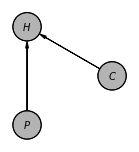

In [30]:
model.check_model()
daft = model.to_daft()
daft.render()

In [31]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['P'], evidence={'C': 1, 'H': 0})
print(posterior_p)


+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.0000 |
+------+----------+
| P(1) |   0.3333 |
+------+----------+
| P(2) |   0.6667 |
+------+----------+


# zadania 

1.   ulepszyć poprzedni przykład tak by w wyniku zamiast P(0) było P(a) itd.
2.   zdealizować sieć z obrazka poniżej
```
pollution = [0.9], [0.1]
smoker = [0.3], [0.7]
cancer = [0.03, 0.05, 0.001, 0.02],[0.97, 0.95, 0.999, 0.98]
xray = [0.9, 0.2], [0.1, 0.8]
dyspnoea = [0.65, 0.3], [0.35, 0.7]
```

3. wypisać niezależności
4. załadować gotową sieć z przykładu survey i sprawdzić prawdopodobieństwo wywołania o = self w przypadku r =small i a = young oraz T gdy plęć to mężczyzna i o = self







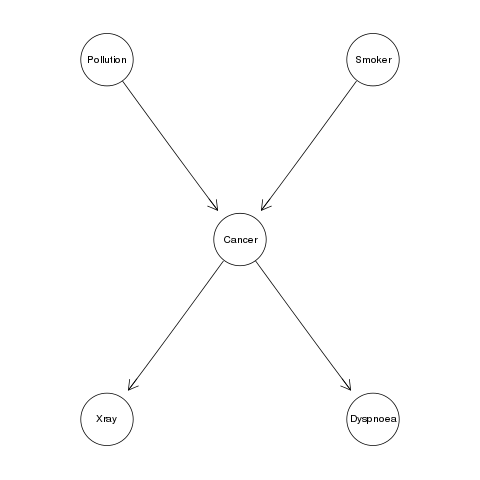

In [43]:
## Task 2
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.base import DAG

# Defining the network structure
model = BayesianNetwork([('POL', 'CANC'), ('SMOK', 'CANC'), ('CANC', 'XRAY'), ('CANC', 'DYSP')])
# model = DAG()
# model.add_nodes_from(['C', 'H', 'P'])
# model.add_edges_from([('C', 'H'), ('P', 'H')])

# Defining the CPDs:
cpd_pollution = TabularCPD('POL', 2, [[0.9], [0.1]])
cpd_smoker = TabularCPD('SMOK', 2, [[0.3], [0.7]])
cpd_xray = TabularCPD('XRAY', 2, [[0.9, 0.2], [0.1, 0.8]], evidence_card=[2], evidence=['CANC'])
cpd_dysp = TabularCPD('DYSP', 2, [[0.65, 0.3], [0.35, 0.7]], evidence_card=[2], evidence=['CANC'])
cpd_cancer = TabularCPD('CANC', 2, [[0.03, 0.05, 0.001, 0.02],[0.97, 0.95, 0.999, 0.98]],
                  evidence=['POL', 'SMOK'], evidence_card=[2, 2], state_names={'POL': ['n', 't'], 
                                                                          'SMOK': ['n', 't'],
                                                                          'CANC': ['n', 't']})


# Associating the CPDs with the network structure.
model.add_cpds(cpd_pollution, cpd_smoker, cpd_cancer, cpd_xray, cpd_dysp)

# Some other methods
model.get_cpds()

[<TabularCPD representing P(POL:2) at 0x7f1998a95e20>,
 <TabularCPD representing P(SMOK:2) at 0x7f1998a95a60>,
 <TabularCPD representing P(CANC:2 | POL:2, SMOK:2) at 0x7f1998b07400>,
 <TabularCPD representing P(XRAY:2 | CANC:2) at 0x7f1998b07d30>,
 <TabularCPD representing P(DYSP:2 | CANC:2) at 0x7f1998a953d0>]

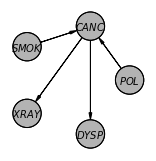

In [44]:
model.check_model()
daft = model.to_daft()
daft.render()

In [45]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['CANC'], evidence={'POL': 1, 'SMOK': 0})
print(posterior_p)


+---------+-------------+
| CANC    |   phi(CANC) |
+=========+=============+
| CANC(n) |      0.0010 |
+---------+-------------+
| CANC(t) |      0.9990 |
+---------+-------------+


In [58]:
independencies = model.get_independencies()

In [59]:
independencies

(SMOK ⟂ POL)
(SMOK ⟂ DYSP, XRAY | CANC)
(SMOK ⟂ XRAY, DYSP | POL, CANC)
(SMOK ⟂ DYSP | CANC, XRAY)
(SMOK ⟂ XRAY | CANC, DYSP)
(SMOK ⟂ DYSP | POL, CANC, XRAY)
(SMOK ⟂ XRAY | POL, CANC, DYSP)
(XRAY ⟂ POL, SMOK, DYSP | CANC)
(XRAY ⟂ SMOK, DYSP | POL, CANC)
(XRAY ⟂ POL, DYSP | CANC, SMOK)
(XRAY ⟂ POL, SMOK | CANC, DYSP)
(XRAY ⟂ DYSP | POL, CANC, SMOK)
(XRAY ⟂ SMOK | POL, CANC, DYSP)
(XRAY ⟂ POL | CANC, SMOK, DYSP)
(POL ⟂ SMOK)
(POL ⟂ DYSP, XRAY | CANC)
(POL ⟂ XRAY | CANC, DYSP)
(POL ⟂ DYSP, XRAY | CANC, SMOK)
(POL ⟂ DYSP | CANC, XRAY)
(POL ⟂ XRAY | CANC, SMOK, DYSP)
(POL ⟂ DYSP | CANC, SMOK, XRAY)
(DYSP ⟂ POL, SMOK, XRAY | CANC)
(DYSP ⟂ SMOK, XRAY | POL, CANC)
(DYSP ⟂ POL, XRAY | CANC, SMOK)
(DYSP ⟂ POL, SMOK | CANC, XRAY)
(DYSP ⟂ XRAY | POL, CANC, SMOK)
(DYSP ⟂ SMOK | POL, CANC, XRAY)
(DYSP ⟂ POL | CANC, SMOK, XRAY)

In [61]:
from pgmpy.utils import get_example_model
model = get_example_model('survey')

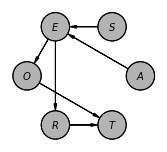

In [62]:
model.check_model()
daft = model.to_daft()
daft.render()

In [64]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['O'], evidence={'R':'small', 'A':'young'})
print(posterior_p)


+---------+----------+
| O       |   phi(O) |
+=========+==========+
| O(emp)  |   0.9500 |
+---------+----------+
| O(self) |   0.0500 |
+---------+----------+


In [69]:

infer = VariableElimination(model)
posterior_p = infer.query(['T'], evidence={'S':'M', 'O':'self'})
print(posterior_p)


+----------+----------+
| T        |   phi(T) |
+==========+==========+
| T(car)   |   0.6677 |
+----------+----------+
| T(train) |   0.2446 |
+----------+----------+
| T(other) |   0.0877 |
+----------+----------+
